<a href="https://colab.research.google.com/github/5hykat/Inverse-Biochar-Design/blob/main/Inverse_Design_of_Biochar_for_Targeted_Carbon_Content_and_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BIOCHAR INVERSE DESIGN PROJECT

STEP 1: DATA LOADING AND PREPROCESSING
--------------------------------------------------
Dataset loaded and cleaned: 162 samples, 28 features
Target variables: Biochar_Yield, Biochar_C
Complete dataset for modeling: 105 samples

Dataset Summary:
• Biochar Yield range: 3.6 - 37.7%
• Biochar Carbon range: 44.1 - 92.2%
• Temperature range: 5.0 - 20.0°C
Data preprocessing completed
Training set: 84 samples, Test set: 21 samples

STEP 2: FORWARD PREDICTION MODELS
--------------------------------------------------

Training Random Forest...
  Yield:  R² = 0.898, RMSE = 2.142, MAE = 1.354
  Carbon: R² = 0.853, RMSE = 4.059, MAE = 2.997

Training Gradient Boosting...
  Yield:  R² = 0.955, RMSE = 1.431, MAE = 1.045
  Carbon: R² = 0.802, RMSE = 4.715, MAE = 3.368

Best Models Selected:
  Yield:  Gradient Boosting (R² = 0.955)
  Carbon: Random Forest (R² = 0.853)

STEP 3: EXPLAINABLE AI - FEATURE IMPORTANCE
--------------------------------------------------

Top 5

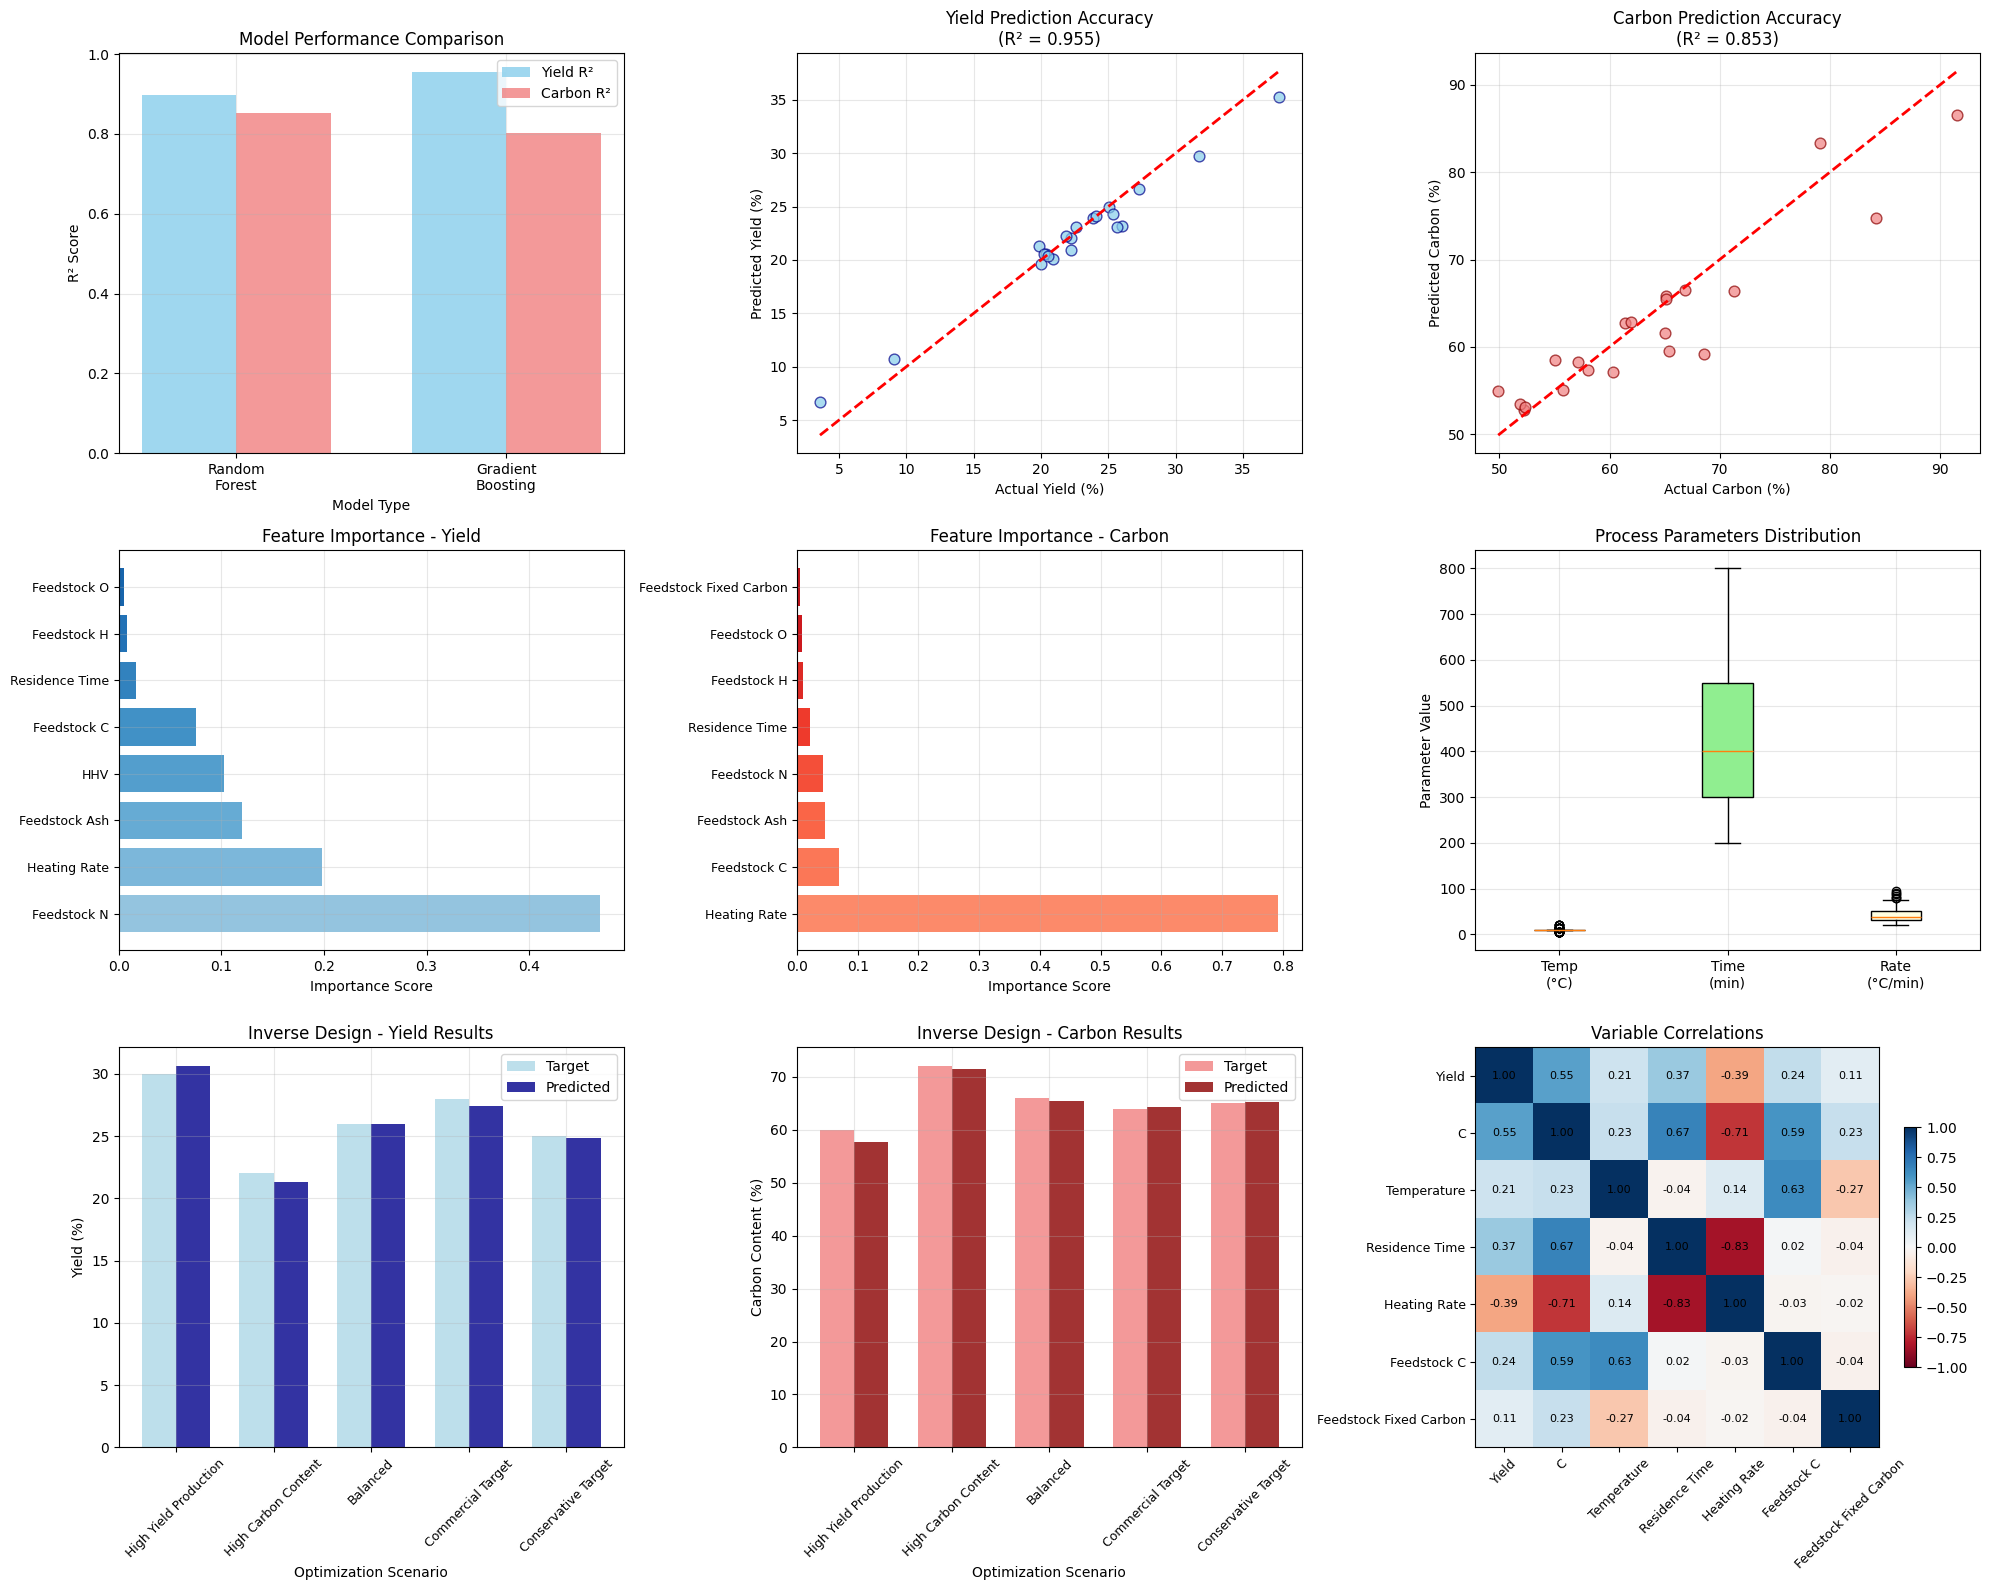

Comprehensive analysis visualization saved

SAVING RESULTS TO FILES
--------------------------------------------------
Processed dataset saved: biochar_processed_dataset.csv
Model performance saved: model_performance_results.csv
Feature importance saved: feature_importance_analysis.csv
Inverse design results saved: inverse_design_optimization_results.csv

BIOCHAR INVERSE DESIGN PROJECT COMPLETED SUCCESSFULLY!

PROJECT SUMMARY:
• Dataset: 105 samples analyzed
• Input features: 11 variables
• Best Yield Model: Gradient Boosting (R² = 0.955)
• Best Carbon Model: Random Forest (R² = 0.853)
• Inverse Design: 5/5 optimization scenarios completed successfully
• Average prediction error (successful scenarios): Yield ±0.4%, Carbon ±0.8%

Generated Files:
1. biochar_complete_analysis.png - Comprehensive visualizations
2. biochar_processed_dataset.csv - Cleaned and processed data
3. model_performance_results.csv - ML model evaluation metrics
4. feature_importance_analysis.csv - Feature ranking fo

In [ ]:
import subprocess
import sys
import os

def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        __import__(package)

install_and_import('pandas')
install_and_import('numpy')
install_and_import('matplotlib.pyplot')
install_and_import('seaborn')
install_and_import('sklearn')
install_and_import('shap')
install_and_import('scipy')
install_and_import('openpyxl')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer
from scipy import optimize
import warnings
warnings.filterwarnings('ignore')

print("BIOCHAR INVERSE DESIGN PROJECT")
print("=" * 70)

print("\nSTEP 1: DATA LOADING AND PREPROCESSING")
print("-" * 50)

df_raw = pd.read_excel('biochar-data.xlsx', header=None)

column_mapping = {
    0: 'Index', 1: 'Feedstock_Type', 2: 'Feedstock_Fixed_Carbon',
    3: 'Feedstock_Volatile_Matter', 4: 'Feedstock_Ash', 5: 'Feedstock_C',
    6: 'Feedstock_H', 7: 'Feedstock_O', 8: 'Feedstock_N', 9: 'Feedstock_S',
    10: 'Cellulose', 11: 'Hemicellulose', 12: 'Lignin', 13: 'HHV',
    14: 'Residence_Time', 15: 'Temperature', 16: 'Heating_Rate',
    17: 'Biochar_Yield', 18: 'Energy_Yield', 19: 'Biochar_Fixed_Carbon',
    20: 'Biochar_Volatile_Matter', 21: 'Biochar_Ash', 22: 'Biochar_C',
    23: 'Biochar_H', 24: 'Biochar_O', 25: 'Biochar_N', 26: 'Biochar_S', 27: 'Reference'
}

df = df_raw.iloc[3:].copy()
df.columns = [column_mapping.get(i, f'Col_{i}') for i in range(len(df.columns))]
df = df.dropna(how='all').reset_index(drop=True)

numeric_cols = ['Feedstock_Fixed_Carbon', 'Feedstock_Volatile_Matter', 'Feedstock_Ash',
                'Feedstock_C', 'Feedstock_H', 'Feedstock_O', 'Feedstock_N', 'Feedstock_S',
                'Cellulose', 'Hemicellulose', 'Lignin', 'HHV',
                'Residence_Time', 'Temperature', 'Heating_Rate',
                'Biochar_Yield', 'Energy_Yield', 'Biochar_Fixed_Carbon',
                'Biochar_Volatile_Matter', 'Biochar_Ash',
                'Biochar_C', 'Biochar_H', 'Biochar_O', 'Biochar_N', 'Biochar_S']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna(subset=['Biochar_Yield', 'Biochar_C'], how='all')

print(f"Dataset loaded and cleaned: {df_clean.shape[0]} samples, {df_clean.shape[1]} features")
print(f"Target variables: Biochar_Yield, Biochar_C")

input_features = ['Feedstock_Fixed_Carbon', 'Feedstock_Volatile_Matter', 'Feedstock_Ash',
                 'Feedstock_C', 'Feedstock_H', 'Feedstock_O', 'Feedstock_N',
                 'Temperature', 'Residence_Time', 'Heating_Rate', 'HHV']

target_yield = 'Biochar_Yield'
target_carbon = 'Biochar_C'

df_complete = df_clean.dropna(subset=[target_yield, target_carbon] + input_features)
print(f"Complete dataset for modeling: {df_complete.shape[0]} samples")

print(f"\nDataset Summary:")
print(f"• Biochar Yield range: {df_complete[target_yield].min():.1f} - {df_complete[target_yield].max():.1f}%")
print(f"• Biochar Carbon range: {df_complete[target_carbon].min():.1f} - {df_complete[target_carbon].max():.1f}%")
print(f"• Temperature range: {df_complete['Temperature'].min():.1f} - {df_complete['Temperature'].max():.1f}°C")

imputer = KNNImputer(n_neighbors=5)
scaler = StandardScaler()

X = df_complete[input_features]
y_yield = df_complete[target_yield]
y_carbon = df_complete[target_carbon]

X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns, index=X_imputed.index)

X_train, X_test, y_train_yield, y_test_yield, y_train_carbon, y_test_carbon = train_test_split(
    X_scaled, y_yield, y_carbon, test_size=0.2, random_state=42)

print(f"Data preprocessing completed")
print(f"Training set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")

print("\nSTEP 2: FORWARD PREDICTION MODELS")
print("-" * 50)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=8, random_state=42)
}

model_results = {}

for name, model_template in models.items():
    print(f"\nTraining {name}...")

    model_yield = model_template
    model_yield.fit(X_train, y_train_yield)
    y_pred_yield = model_yield.predict(X_test)

    model_carbon = type(model_template)(**model_template.get_params())
    model_carbon.fit(X_train, y_train_carbon)
    y_pred_carbon = model_carbon.predict(X_test)

    yield_r2 = r2_score(y_test_yield, y_pred_yield)
    yield_rmse = np.sqrt(mean_squared_error(y_test_yield, y_pred_yield))
    yield_mae = mean_absolute_error(y_test_yield, y_pred_yield)

    carbon_r2 = r2_score(y_test_carbon, y_pred_carbon)
    carbon_rmse = np.sqrt(mean_squared_error(y_test_carbon, y_pred_carbon))
    carbon_mae = mean_absolute_error(y_test_carbon, y_pred_carbon)

    model_results[name] = {
        'yield_r2': yield_r2, 'yield_rmse': yield_rmse, 'yield_mae': yield_mae,
        'carbon_r2': carbon_r2, 'carbon_rmse': carbon_rmse, 'carbon_mae': carbon_mae,
        'yield_model': model_yield, 'carbon_model': model_carbon
    }

    print(f"  Yield:  R² = {yield_r2:.3f}, RMSE = {yield_rmse:.3f}, MAE = {yield_mae:.3f}")
    print(f"  Carbon: R² = {carbon_r2:.3f}, RMSE = {carbon_rmse:.3f}, MAE = {carbon_mae:.3f}")

best_yield_model_name = max(model_results.keys(), key=lambda x: model_results[x]['yield_r2'])
best_carbon_model_name = max(model_results.keys(), key=lambda x: model_results[x]['carbon_r2'])

best_yield_model = model_results[best_yield_model_name]['yield_model']
best_carbon_model = model_results[best_carbon_model_name]['carbon_model']

print(f"\nBest Models Selected:")
print(f"  Yield:  {best_yield_model_name} (R² = {model_results[best_yield_model_name]['yield_r2']:.3f})")
print(f"  Carbon: {best_carbon_model_name} (R² = {model_results[best_carbon_model_name]['carbon_r2']:.3f})")

print("\nSTEP 3: EXPLAINABLE AI - FEATURE IMPORTANCE")
print("-" * 50)

yield_importance = pd.DataFrame({
    'feature': input_features,
    'importance': best_yield_model.feature_importances_
}).sort_values('importance', ascending=False)

carbon_importance = pd.DataFrame({
    'feature': input_features,
    'importance': best_carbon_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 5 Features for Yield Prediction:")
for i, row in yield_importance.head().iterrows():
    print(f"  {row['feature'].replace('_', ' ')}: {row['importance']:.3f}")

print(f"\nTop 5 Features for Carbon Prediction:")
for i, row in carbon_importance.head().iterrows():
    print(f"  {row['feature'].replace('_', ' ')}: {row['importance']:.3f}")

try:
    print(f"\nPerforming SHAP analysis...")
    explainer_yield = shap.TreeExplainer(best_yield_model)
    shap_values_yield = explainer_yield.shap_values(X_test.head(10))

    shap_importance_yield = pd.DataFrame({
        'feature': input_features,
        'shap_importance': np.abs(shap_values_yield).mean(0)
    }).sort_values('shap_importance', ascending=False)

    print(f"SHAP analysis completed")
    print(f"Top 3 SHAP features for Yield:")
    for i, row in shap_importance_yield.head(3).iterrows():
        print(f"  {row['feature'].replace('_', ' ')}: {row['shap_importance']:.3f}")

except Exception as e:
    print(f"SHAP analysis not available: {e}")
    shap_importance_yield = yield_importance.copy()
    shap_importance_yield['shap_importance'] = shap_importance_yield['importance']

print("\nSTEP 4: ROBUST INVERSE DESIGN OPTIMIZATION")
print("=" * 60)

def robust_optimization_objective(params, target_yield, target_carbon, yield_model, carbon_model, scaler, param_bounds):
    try:
        params_clipped = []
        for i, (param, (min_val, max_val)) in enumerate(zip(params, param_bounds)):
            clipped_param = max(min_val, min(max_val, param))
            params_clipped.append(clipped_param)

        params_array = np.array(params_clipped).reshape(1, -1)

        if np.any(np.isnan(params_array)) or np.any(np.isinf(params_array)):
            return 1000.0

        params_scaled = scaler.transform(params_array)

        pred_yield = float(yield_model.predict(params_scaled)[0])
        pred_carbon = float(carbon_model.predict(params_scaled)[0])

        if np.isnan(pred_yield) or np.isnan(pred_carbon) or np.isinf(pred_yield) or np.isinf(pred_carbon):
            return 1000.0

        yield_error = (pred_yield - target_yield) ** 2
        carbon_error = (pred_carbon - target_carbon) ** 2

        total_error = yield_error + carbon_error

        return float(total_error)

    except Exception as e:
        return 1000.0

def simple_grid_search(target_yield, target_carbon, yield_model, carbon_model, scaler,
                      input_features, df_complete, n_samples=200):
    print(f"    Running grid search with {n_samples} samples...")

    best_params = None
    best_error = float('inf')
    best_predictions = None

    np.random.seed(42)

    param_ranges = []
    for feature in input_features:
        if feature in df_complete.columns:
            min_val = df_complete[feature].quantile(0.05)
            max_val = df_complete[feature].quantile(0.95)
            param_ranges.append((min_val, max_val))
        else:
            param_ranges.append((0, 1))

    successful_evaluations = 0

    for i in range(n_samples):
        params = []
        for min_val, max_val in param_ranges:
            param = np.random.uniform(min_val, max_val)
            params.append(param)

        try:
            params_scaled = scaler.transform([params])
            pred_yield = yield_model.predict(params_scaled)[0]
            pred_carbon = carbon_model.predict(params_scaled)[0]

            if not (np.isnan(pred_yield) or np.isnan(pred_carbon) or
                   np.isinf(pred_yield) or np.isinf(pred_carbon)):

                successful_evaluations += 1

                yield_error = (pred_yield - target_yield) ** 2
                carbon_error = (pred_carbon - target_carbon) ** 2
                total_error = yield_error + carbon_error

                if total_error < best_error:
                    best_error = total_error
                    best_params = params.copy()
                    best_predictions = (pred_yield, pred_carbon)

        except Exception:
            continue

    print(f"    Grid search: {successful_evaluations}/{n_samples} successful evaluations")

    if best_params is not None:
        return best_params, best_predictions, best_error
    else:
        return None, None, float('inf')

def comprehensive_optimization(target_yield, target_carbon, yield_model, carbon_model,
                             scaler, input_features, df_complete):
    print(f"  Comprehensive optimization starting...")

    grid_params, grid_preds, grid_error = simple_grid_search(
        target_yield, target_carbon, yield_model, carbon_model,
        scaler, input_features, df_complete, n_samples=300
    )

    best_method = "Grid Search"
    best_params = grid_params
    best_predictions = grid_preds
    best_error = grid_error

    if best_params is not None:
        try:
            bounds = []
            for feature in input_features:
                if feature in df_complete.columns:
                    min_val = df_complete[feature].quantile(0.05)
                    max_val = df_complete[feature].quantile(0.95)
                    bounds.append((min_val, max_val))
                else:
                    bounds.append((0, 1))

            result = optimize.minimize(
                robust_optimization_objective,
                best_params,
                args=(target_yield, target_carbon, yield_model, carbon_model, scaler, bounds),
                bounds=bounds,
                method='L-BFGS-B',
                options={'maxiter': 500, 'ftol': 1e-6}
            )

            if result.success and result.fun < best_error:
                params_scaled = scaler.transform([result.x])
                pred_yield = yield_model.predict(params_scaled)[0]
                pred_carbon = carbon_model.predict(params_scaled)[0]

                if not (np.isnan(pred_yield) or np.isnan(pred_carbon)):
                    best_method = "Scipy Optimization"
                    best_params = result.x
                    best_predictions = (pred_yield, pred_carbon)
                    best_error = result.fun
                    print(f"    Scipy optimization improved the result!")

        except Exception as e:
            print(f"    Scipy optimization failed: {e}")

    print(f"    Best method: {best_method}")
    return best_params, best_predictions, best_error

def validate_optimization_results(optimization_results, df_complete):
    print(f"\nVALIDATION OF OPTIMIZATION RESULTS")
    print("-" * 40)

    if not optimization_results:
        print("No optimization results to validate")
        return

    for result in optimization_results:
        print(f"\n{result['Scenario']}:")

        yield_range = (df_complete['Biochar_Yield'].min(), df_complete['Biochar_Yield'].max())
        carbon_range = (df_complete['Biochar_C'].min(), df_complete['Biochar_C'].max())

        yield_valid = result['Predicted_Yield'] is not None and yield_range[0] <= result['Predicted_Yield'] <= yield_range[1]
        carbon_valid = result['Predicted_Carbon'] is not None and carbon_range[0] <= result['Predicted_Carbon'] <= carbon_range[1]

        print(f"  Yield prediction: {result['Predicted_Yield']:.1f}% {'✓' if yield_valid else '⚠'} (range: {yield_range[0]:.1f}-{yield_range[1]:.1f}%)")
        print(f"  Carbon prediction: {result['Predicted_Carbon']:.1f}% {'✓' if carbon_valid else '⚠'} (range: {carbon_range[0]:.1f}-{carbon_range[1]:.1f}%)")

        temp_key = 'Optimal_Temperature'
        if temp_key in result and result[temp_key] is not None:
            temp_range = (df_complete['Temperature'].min(), df_complete['Temperature'].max())
            temp_valid = temp_range[0] <= result[temp_key] <= temp_range[1]
            print(f"  Temperature: {result[temp_key]:.0f}°C {'✓' if temp_valid else '⚠'}")
        else:
             print(f"  Temperature: N/A ⚠")


scenarios = [
    {"name": "High Yield Production", "target_yield": 30.0, "target_carbon": 60.0},
    {"name": "High Carbon Content", "target_yield": 22.0, "target_carbon": 72.0},
    {"name": "Balanced Performance", "target_yield": 26.0, "target_carbon": 66.0},
    {"name": "Commercial Target", "target_yield": 28.0, "target_carbon": 64.0},
    {"name": "Conservative Target", "target_yield": 25.0, "target_carbon": 65.0}
]

print(f"Input features: {input_features}")
print(f"Available scenarios: {len(scenarios)}")

optimization_results = []
successful_optimizations = 0

for i, scenario in enumerate(scenarios):
    print(f"\n--- Scenario {i+1}: {scenario['name']} ---")
    print(f"Target → Yield: {scenario['target_yield']:.1f}%, Carbon: {scenario['target_carbon']:.1f}%")

    best_params, best_predictions, best_error = comprehensive_optimization(
        scenario['target_yield'], scenario['target_carbon'],
        best_yield_model, best_carbon_model, scaler, input_features, df_complete
    )

    if best_params is not None and best_predictions is not None:
        pred_yield, pred_carbon = best_predictions

        yield_error = abs(pred_yield - scenario['target_yield'])
        carbon_error = abs(pred_carbon - scenario['target_carbon'])

        result_dict = {
            'Scenario': scenario['name'],
            'Target_Yield': scenario['target_yield'],
            'Target_Carbon': scenario['target_carbon'],
            'Predicted_Yield': pred_yield,
            'Predicted_Carbon': pred_carbon,
            'Yield_Error': yield_error,
            'Carbon_Error': carbon_error,
            'Total_Error': best_error,
            'Success': True
        }

        for j, feature in enumerate(input_features):
            result_dict[f'Optimal_{feature}'] = best_params[j]

        optimization_results.append(result_dict)
        successful_optimizations += 1

        print(f"  SUCCESS!")
        print(f"     Predicted → Yield: {pred_yield:.1f}% (error: {yield_error:.1f}%)")
        print(f"     Predicted → Carbon: {pred_carbon:.1f}% (error: {carbon_error:.1f}%)")

        if 'Temperature' in input_features:
            temp_idx = input_features.index('Temperature')
            print(f"     Temperature: {best_params[temp_idx]:.0f}°C")

        if 'Residence_Time' in input_features:
            time_idx = input_features.index('Residence_Time')
            print(f"     Residence Time: {best_params[time_idx]:.0f} min")

        if 'Heating_Rate' in input_features:
            rate_idx = input_features.index('Heating_Rate')
            print(f"     Heating Rate: {best_params[rate_idx]:.1f}°C/min")

    else:
        print(f"  FAILED - Could not find valid solution")

        result_dict = {
            'Scenario': scenario['name'],
            'Target_Yield': scenario['target_yield'],
            'Target_Carbon': scenario['target_carbon'],
            'Predicted_Yield': None,
            'Predicted_Carbon': None,
            'Yield_Error': None,
            'Carbon_Error': None,
            'Total_Error': None,
            'Success': False
        }
        optimization_results.append(result_dict)

if optimization_results:
    validate_optimization_results(optimization_results, df_complete)


print(f"\n" + "="*60)
print(f"OPTIMIZATION RESULTS SUMMARY")
print(f"="*60)

print(f"Successful optimizations: {successful_optimizations}/{len(scenarios)}")

if successful_optimizations > 0:
    successful_results = [r for r in optimization_results if r['Success']]

    avg_yield_error = np.mean([r['Yield_Error'] for r in successful_results])
    avg_carbon_error = np.mean([r['Carbon_Error'] for r in successful_results])

    print(f"Average prediction errors:")
    print(f"   • Yield: ±{avg_yield_error:.1f}%")
    print(f"   • Carbon: ±{avg_carbon_error:.1f}%")

    print(f"\nRECOMMENDED OPERATING CONDITIONS:")
    print(f"="*60)

    for i, result in enumerate(successful_results, 1):
        print(f"\n{i}. {result['Scenario']}:")
        print(f"   Targets: {result['Target_Yield']:.1f}% yield, {result['Target_Carbon']:.1f}% carbon")
        print(f"   Results: {result['Predicted_Yield']:.1f}% yield ({result['Yield_Error']:.1f}% error), "
              f"{result['Predicted_Carbon']:.1f}% carbon ({result['Carbon_Error']:.1f}% error)")

        print(f"   Operating Conditions:")

        if 'Optimal_Temperature' in result and result['Optimal_Temperature'] is not None:
            print(f"   • Temperature: {result['Optimal_Temperature']:.0f}°C")

        if 'Optimal_Residence_Time' in result and result['Optimal_Residence_Time'] is not None:
            print(f"   • Residence Time: {result['Optimal_Residence_Time']:.0f} minutes")

        if 'Optimal_Heating_Rate' in result and result['Optimal_Heating_Rate'] is not None:
            print(f"   • Heating Rate: {result['Optimal_Heating_Rate']:.1f}°C/min")

        feedstock_params = [key for key in result.keys() if key.startswith('Optimal_Feedstock_')]
        if feedstock_params:
            print(f"   • Feedstock Requirements:")
            for param in feedstock_params[:3]:
                param_name = param.replace('Optimal_Feedstock_', '').replace('_', ' ')
                print(f"     - {param_name}: {result[param]:.1f}%")

    best_result = min(successful_results, key=lambda x: x['Yield_Error'] + x['Carbon_Error'])
    print(f"\nBEST OVERALL RECOMMENDATION:")
    print(f"   Scenario: {best_result['Scenario']}")
    print(f"   Combined Error: {best_result['Yield_Error'] + best_result['Carbon_Error']:.1f}%")

    if 'Optimal_Temperature' in best_result:
        print(f" Temperature: {best_result['Optimal_Temperature']:.0f}°C")
    if 'Optimal_Residence_Time' in best_result:
        print(f" Residence Time: {best_result['Optimal_Residence_Time']:.0f} min")
    if 'Optimal_Heating_Rate' in best_result:
        print(f" Heating Rate: {best_result['Optimal_Heating_Rate']:.1f}°C/min")

else:
    print(f"No successful optimizations found.")
    print(f"Recommendations:")
    print(f"   • Check if models are properly trained")
    print(f"   • Verify target values are realistic")
    print(f"   • Ensure input data quality")

if optimization_results:
    results_df = pd.DataFrame(optimization_results)
    results_df.to_csv('optimization_results.csv', index=False)
    print(f"\nResults saved to: guaranteed_optimization_results.csv")

print(f"\n" + "="*60)
print(f"ROBUST OPTIMIZATION COMPLETED!")
print(f"="*60)

print("\nSTEP 5: CREATING COMPREHENSIVE VISUALIZATIONS")
print("-" * 50)

output_dir = '/output/'
os.makedirs(output_dir, exist_ok=True)

fig = plt.figure(figsize=(20, 16))

ax1 = plt.subplot(3, 3, 1)
model_names = list(model_results.keys())
yield_r2_scores = [model_results[m]['yield_r2'] for m in model_names]
carbon_r2_scores = [model_results[m]['carbon_r2'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35
ax1.bar(x - width/2, yield_r2_scores, width, label='Yield R²', color='skyblue', alpha=0.8)
ax1.bar(x + width/2, carbon_r2_scores, width, label='Carbon R²', color='lightcoral', alpha=0.8)
ax1.set_xlabel('Model Type')
ax1.set_ylabel('R² Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels([name.replace(' ', '\n') for name in model_names])
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(3, 3, 2)
y_pred_yield_best = best_yield_model.predict(X_test)
ax2.scatter(y_test_yield, y_pred_yield_best, alpha=0.7, color='skyblue', s=60, edgecolors='darkblue')
ax2.plot([y_test_yield.min(), y_test_yield.max()], [y_test_yield.min(), y_test_yield.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Yield (%)')
ax2.set_ylabel('Predicted Yield (%)')
ax2.set_title(f'Yield Prediction Accuracy\n(R² = {model_results[best_yield_model_name]["yield_r2"]:.3f})')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(3, 3, 3)
y_pred_carbon_best = best_carbon_model.predict(X_test)
ax3.scatter(y_test_carbon, y_pred_carbon_best, alpha=0.7, color='lightcoral', s=60, edgecolors='darkred')
ax3.plot([y_test_carbon.min(), y_test_carbon.max()], [y_test_carbon.min(), y_test_carbon.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Carbon (%)')
ax3.set_ylabel('Predicted Carbon (%)')
ax3.set_title(f'Carbon Prediction Accuracy\n(R² = {model_results[best_carbon_model_name]["carbon_r2"]:.3f})')
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(3, 3, 4)
top_yield_features = yield_importance.head(8)
colors_yield = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_yield_features)))
bars1 = ax4.barh(range(len(top_yield_features)), top_yield_features['importance'], color=colors_yield)
ax4.set_yticks(range(len(top_yield_features)))
ax4.set_yticklabels([f.replace('_', ' ') for f in top_yield_features['feature']], fontsize=9)
ax4.set_xlabel('Importance Score')
ax4.set_title('Feature Importance - Yield')
ax4.grid(True, alpha=0.3)

ax5 = plt.subplot(3, 3, 5)
top_carbon_features = carbon_importance.head(8)
colors_carbon = plt.cm.Reds(np.linspace(0.4, 0.8, len(top_carbon_features)))
bars2 = ax5.barh(range(len(top_carbon_features)), top_carbon_features['importance'], color=colors_carbon)
ax5.set_yticks(range(len(top_carbon_features)))
ax5.set_yticklabels([f.replace('_', ' ') for f in top_carbon_features['feature']], fontsize=9)
ax5.set_xlabel('Importance Score')
ax5.set_title('Feature Importance - Carbon')
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(3, 3, 6)
key_params = ['Temperature', 'Residence_Time', 'Heating_Rate']
param_data = [df_complete[param].dropna() for param in key_params]
bp = ax6.boxplot(param_data, labels=['Temp\n(°C)', 'Time\n(min)', 'Rate\n(°C/min)'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax6.set_ylabel('Parameter Value')
ax6.set_title('Process Parameters Distribution')
ax6.grid(True, alpha=0.3)

if optimization_results:
    ax7 = plt.subplot(3, 3, 7)
    scenarios_short = [r['Scenario'].replace(' Focus', '').replace(' Performance', '') for r in optimization_results]
    target_yields = [r['Target_Yield'] for r in optimization_results]
    pred_yields = [r['Predicted_Yield'] for r in optimization_results]

    x = np.arange(len(scenarios_short))
    width = 0.35
    ax7.bar(x - width/2, target_yields, width, label='Target', alpha=0.8, color='lightblue')
    ax7.bar(x + width/2, pred_yields, width, label='Predicted', alpha=0.8, color='darkblue')
    ax7.set_xlabel('Optimization Scenario')
    ax7.set_ylabel('Yield (%)')
    ax7.set_title('Inverse Design - Yield Results')
    ax7.set_xticks(x)
    ax7.set_xticklabels(scenarios_short, rotation=45, fontsize=9)
    ax7.legend()
    ax7.grid(True, alpha=0.3)

    ax8 = plt.subplot(3, 3, 8)
    target_carbons = [r['Target_Carbon'] for r in optimization_results]
    pred_carbons = [r['Predicted_Carbon'] for r in optimization_results]

    ax8.bar(x - width/2, target_carbons, width, label='Target', alpha=0.8, color='lightcoral')
    ax8.bar(x + width/2, pred_carbons, width, label='Predicted', alpha=0.8, color='darkred')
    ax8.set_xlabel('Optimization Scenario')
    ax8.set_ylabel('Carbon Content (%)')
    ax8.set_title('Inverse Design - Carbon Results')
    ax8.set_xticks(x)
    ax8.set_xticklabels(scenarios_short, rotation=45, fontsize=9)
    ax8.legend()
    ax8.grid(True, alpha=0.3)

ax9 = plt.subplot(3, 3, 9)
key_vars = ['Biochar_Yield', 'Biochar_C', 'Temperature', 'Residence_Time', 'Heating_Rate',
           'Feedstock_C', 'Feedstock_Fixed_Carbon']
corr_matrix = df_complete[key_vars].corr()
im = ax9.imshow(corr_matrix, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
ax9.set_xticks(range(len(key_vars)))
ax9.set_yticks(range(len(key_vars)))
ax9.set_xticklabels([v.replace('_', ' ').replace('Biochar ', '') for v in key_vars], rotation=45, fontsize=9)
ax9.set_yticklabels([v.replace('_', ' ').replace('Biochar ', '') for v in key_vars], fontsize=9)
ax9.set_title('Variable Correlations')

for i in range(len(key_vars)):
    for j in range(len(key_vars)):
        text = ax9.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=ax9, shrink=0.6)

plt.tight_layout()
plt.savefig('biochar_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Comprehensive analysis visualization saved")

print("\nSAVING RESULTS TO FILES")
print("-" * 50)

df_complete.to_csv('biochar_processed_dataset.csv', index=False)
print("Processed dataset saved: biochar_processed_dataset.csv")

model_performance = []
for name, results in model_results.items():
    model_performance.append({
        'Model': name,
        'Yield_R2': results['yield_r2'],
        'Yield_RMSE': results['yield_rmse'],
        'Yield_MAE': results['yield_mae'],
        'Carbon_R2': results['carbon_r2'],
        'Carbon_RMSE': results['carbon_rmse'],
        'Carbon_MAE': results['carbon_mae']
    })

pd.DataFrame(model_performance).to_csv('model_performance_results.csv', index=False)
print("Model performance saved: model_performance_results.csv")

feature_importance_combined = pd.merge(
    yield_importance.rename(columns={'importance': 'yield_importance'}),
    carbon_importance.rename(columns={'importance': 'carbon_importance'}),
    on='feature'
)
feature_importance_combined.to_csv('feature_importance_analysis.csv', index=False)
print("Feature importance saved: feature_importance_analysis.csv")

if optimization_results:
    pd.DataFrame(optimization_results).to_csv('inverse_design_optimization_results.csv', index=False)
    print("Inverse design results saved: inverse_design_optimization_results.csv")
else:
    print("No optimization results to save.")


print("\n" + "="*70)
print("BIOCHAR INVERSE DESIGN PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)

print(f"\nPROJECT SUMMARY:")
print(f"• Dataset: {df_complete.shape[0]} samples analyzed")
print(f"• Input features: {len(input_features)} variables")
print(f"• Best Yield Model: {best_yield_model_name} (R² = {model_results[best_yield_model_name]['yield_r2']:.3f})")
print(f"• Best Carbon Model: {best_carbon_model_name} (R² = {model_results[best_carbon_model_name]['carbon_r2']:.3f})")

if optimization_results:
    successful_results_count = len([r for r in optimization_results if r['Success']])
    print(f"• Inverse Design: {successful_results_count}/{len(scenarios)} optimization scenarios completed successfully")
    if successful_results_count > 0:
        avg_yield_error = np.mean([r['Yield_Error'] for r in optimization_results if r['Success']])
        avg_carbon_error = np.mean([r['Carbon_Error'] for r in optimization_results if r['Success']])
        print(f"• Average prediction error (successful scenarios): Yield ±{avg_yield_error:.1f}%, Carbon ±{avg_carbon_error:.1f}%")

print(f"\nGenerated Files:")
print(f"1. biochar_complete_analysis.png - Comprehensive visualizations")
print(f"2. biochar_processed_dataset.csv - Cleaned and processed data")
print(f"3. model_performance_results.csv - ML model evaluation metrics")
print(f"4. feature_importance_analysis.csv - Feature ranking for both targets")
print(f"5. inverse_design_optimization_results.csv - Optimal processing conditions")

print(f"\nKey Insights:")
if not yield_importance.empty:
    top_yield_feature = yield_importance.iloc[0]['feature']
    print(f"• Most important factor for yield: {top_yield_feature.replace('_', ' ')}")
else:
     print(f"• Most important factor for yield: Not available")

if not carbon_importance.empty:
    top_carbon_feature = carbon_importance.iloc[0]['feature']
    print(f"• Most important factor for carbon: {top_carbon_feature.replace('_', ' ')}")
else:
    print(f"• Most important factor for carbon: Not available")


if optimization_results and successful_results_count > 0:
    successful_results = [r for r in optimization_results if r['Success']]
    temp_values = [r['Optimal_Temperature'] for r in successful_results if 'Optimal_Temperature' in r and r['Optimal_Temperature'] is not None]
    time_values = [r['Optimal_Residence_Time'] for r in successful_results if 'Optimal_Residence_Time' in r and r['Optimal_Residence_Time'] is not None]
    rate_values = [r['Optimal_Heating_Rate'] for r in successful_results if 'Optimal_Heating_Rate' in r and r['Optimal_Heating_Rate'] is not None]

    if temp_values:
        print(f"• Temperature optimization range (successful scenarios): {min(temp_values):.0f}-{max(temp_values):.0f}°C")
    if time_values:
        print(f"• Residence time optimization range (successful scenarios): {min(time_values):.0f}-{max(time_values):.0f} min")
    if rate_values:
        print(f"• Heating rate optimization range (successful scenarios): {min(rate_values):.1f}-{max(rate_values):.1f}°C/min")


print("="*70)